# Week 6: Inferential Statistics

In [2]:
# Loading the libraries
import numpy as np
import sympy as sy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

np.random.seed(123)

In [ ]:
#!pip install scipy

## Day 3: Hypothesis Tests (continued)
### Comparing two means: the two sample *t*-test
Most frequently we have to compare two samples in terms of their means: do the two samples come from populations with equal means? In other words: do the two samples come from the same population, or from different populations?

The *t*-test can be adapted to work in this context. Assume we have two samples which come from two populations, with means $\mu_1$ and $\mu_2$ respectively. The hypotheses of the test are:
\begin{equation}
H_0: \mu_1 = \mu_2
\end{equation}
and
\begin{equation}
\begin{array}{rcl}
H_a: \mu_1 &\neq& \mu_2\\
H_a: \mu_1 &<& \mu_2\\
H_a: \mu_1 &>& \mu_2
\end{array}
\end{equation}

Without getting into the details of how the test manages to produce a $p$-value, we use the `scipy`'s capabilities and directly step into problem-solving.

### Example 1: 
Home values tend to increase over time under normal conditions, but the recession of 2008 and 2009 has reportedly caused the sales price of existing homes to fall accross the US. Do data support this conclusion? The cell below contains data on 30 existing home sales in 2006 and 40 existing home sales in 2009. Is there any evidence that the prices have fallen in 2009 compared to 2006?

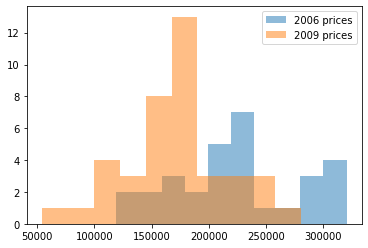

p value is  2.1094588950811116e-05
we reject the H0


In [ ]:
# the samples
s_2006 = np.array([213100, 226200, 239100, 214300, 161700, 181200, 228600, 222100, 228900, 235800, 
                   219400, 238800, 301800, 264200, 320200, 315000, 118900, 172400, 137500, 212800, 
                   175400, 311400, 296900, 292500, 287700, 246500, 195600, 155300, 152400, 211200])

s_2009 = np.array([155400, 189800, 200800, 280400, 213200, 181100, 117400, 130000, 170000, 149600,
                   146200, 54400, 213800, 186000, 182100, 180000, 215700, 164200, 95300, 239500,
                   207200, 188200, 169400, 185600, 177000, 178000, 161200, 249200, 146400, 99800,
                   246700, 173500, 138100, 112200, 137500, 147900, 179000, 116200, 197500, 164200])


# hypotheses
# H0: mu_2006 = mu_2009   <--- always has "="
# Ha: mu_2006 > mu_2009   <--- test if prices dropped in 2009



plt.plot()
plt.hist(s_2006, alpha = 0.5, label = "2006 prices")
plt.hist(s_2009, alpha = 0.5, label = "2009 prices")
plt.legend()
plt.show()
t_stat, p_2 = stats.ttest_ind(s_2006, s_2009, equal_var = False)  #, alternative="greater"; for higher version of scipy (1.6 or greater)
print("p value is ", p_2/2)
if p_2/2 < 0.5: 
  print("we reject the H0")
else:
  print("we do not have sufficient data to reject the H0")

### Comparing more than two means: the One-Way ANOVA *F*-test
The One-Way ANOVA *F*-test extends the two-sample *t*-test from two to an arbitrary number of samples. If you need to test if the means of more than two samples are equal, then you should use this test.

The hypotheses are:
\begin{equation}
\begin{array}{rcl}
H_0&:& \text{all means are equal}\\
H_a&:& \text{not all means are equal}
\end{array}
\end{equation}

There are three things that you must have in mind about the One-Way ANOVA *F*-test:
* The alternative hypotheses tests for generall difference between the means, similar to the $"\neq"$ alternatives of the *t*-test
* The test assumes that the variances of the population in question are all equal
* If you end up rejecting $H_0$, then the test does not tell you which means *are* different to answer this question, you will have to run **post-hoc** tests to identify the source(s) of the difference

### Example 2
The Consumer Reports Restaurant Customer Satisfaction Survey is based upon 148,599 visits to full-service restaurant chains. One of the variables in the study is meal price, the average amount paid per person for dinner and drinks, minus the tip. Suppose a reporter for the Sun Coast Times thought that it would be of interest to her readers to conduct a similar study for restaurants located on the Grand Strand section in Myrtle Beach, South Carolina. The reporter selected a random sample of 8 seafood restaurants, 8 Italian restaurants, and 8 steakhouses. The data in the cell below show the meal prices (in dollars) obtained for the 24 restaurants sampled. Is a significant difference among the mean meal price for the three types of restaurants?

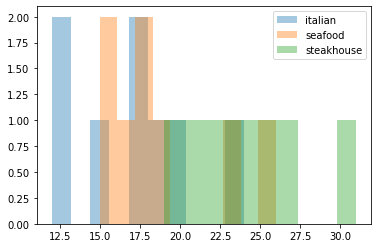

F_onewayResult(statistic=7.328859060402685, pvalue=0.003852036077363886)

In [ ]:
# samples
italian = np.array([12, 13, 15, 17, 18, 20, 17, 24])
seafood = np.array([16, 18, 17, 26, 23, 15, 19, 18])
steakhouse = np.array([24, 19, 23, 25, 21, 22, 27, 31])


# Hypotheses
# H0: all means are equal
# Ha: not all means are equal

plt.plot()
plt.hist(italian, alpha = 0.4, label = "italian")
plt.hist(seafood, alpha = 0.4, label = "seafood")
plt.hist(steakhouse, alpha = 0.4, label = "steakhouse")
plt.legend()
plt.show()

stats.f_oneway(italian, seafood, steakhouse)

### Example 2a
Run a post-hoc test to establish where do the differences come from. Use **Tukey Honestly Significant Difference (HSD)** test.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#create a single dataframe of the data
df = pd.DataFrame({'price': np.concatenate([italian, seafood, steakhouse]),
                   'group': np.repeat(["italian", "seafood", "steakhouse"], repeats= 8 )})

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['price'],
                          groups=df['group'],
                          alpha=0.05)

#display results

display(df)
print(tukey)

,price,group
0,12,italian
1,13,italian
2,15,italian
3,17,italian
4,18,italian
5,20,italian
6,17,italian
7,24,italian
8,16,seafood
9,18,seafood


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2   meandiff p-adj   lower   upper  reject
---------------------------------------------------------
italian    seafood      2.0 0.5466 -2.7462  6.7462  False
italian steakhouse      7.0 0.0035  2.2538 11.7462   True
seafood steakhouse      5.0 0.0378  0.2538  9.7462   True
---------------------------------------------------------


### $\chi^2$-test for Independence
Next we work with two **categorical variables** and we are going to answer questions like:
* Are left-handed and right-handed people equally likely to prefer technical or social sciences, or maybe neither?
* Are eye color and hair color independent traits among men and women?

The test is called **chi-square independence (or association) test**. The hypotheses of the test are:
* $H_0: \text{ the variables are independent (or: not associated, not related)}$
* $H_a: \text{ the variables are NOT independent (or: not associated, not related)}$

*How does the test work?* We supply the test with a table that contains crosstabulated **counts** for all the combinations of categories of the two variables; alternatively we could supply raw data. These are called **observed data**. Assuming $H_0$ is true (i.e. the variables are indeed independent), the test constructs an intermediate **expected data** which is a representation of *what data of the input shape would look like in theory*. Finally, based on the cumulative difference between the observed and expected data is quantified via a $\chi^2$-statistics:
\begin{equation} \chi_{\text{stat}}^2 = \displaystyle\sum_{i} \frac{\left( \text{obs}_i - \text{exp}_i \right) ^ 2}{\text{exp}_i}, \end{equation}
from where a $p$-value is obtained. The interpretation of the $p$-value is the same as before.

### Example 3
A beer industry association conducts a survey to determine the preferences of beer drinkers for light, regular, and dark beers. A sample of 200 beer drinkers is taken with each person in the sample asked to indicate a preference for one of the three types of beers: light, regular, or dark. At the end of the survey questionnaire, the respondent is asked to provide information on a variety of demographics including gender: male or female. A research question of interest to the association is whether preference for the three types of beer is independent of the gender of the beer drinker. Run a chi-square independence test to reach a conclusion.

**Note:** *gender* is given across the columns, *beer* is given across the rows.

|         | Male   | Female | Total | % total share| % male share| % female share
| ------- | :----: | :----: | :----: | :----: | :----: | :----: |
| **Light**   | 51     | 39     |90| 45%|
| **Regular** | 56     | 21     |77| 38.5%|
| **Dark**    | 25     | 8      |33| 16.5%|

In [ ]:
# obs_data
obs_data = np.array([[51, 39], [56, 21], [25, 8]])

# Hypotheses:
# H0: beer preference is independent of gender
# Ha: beer preference is NOT independent of gender

# Running the chi-square test
chi_sq_stat, p, df, exp_data = stats.chi2_contingency(obs_data)
print('chi_sq = ', chi_sq_stat)
print('p-value = ', p)
print('expected data:\n', exp_data)

if p < 0.05:
    print('Based on the data, there is evidence that beer preference is NOT independent of gender')
else:
    print('Based on the data, there is NO evidence that beer preference is NOT independent of gender')

chi_sq =  6.446821152703504
p-value =  0.03981902059909915
expected data:
 [[59.4  30.6 ]
 [50.82 26.18]
 [21.78 11.22]]
Based on the data, there is evidence that beer preference is NOT independent of gender


### Example 4
*The Wall Street Journal* Corporate Perceptions Study 2011 surveyed readers and asked how each rated the quality of management and the reputation of the company for over 250 worldwide corporations. Both the **quality of management** and the **reputation of the company** were rated on an excellent, good, and fair categorical scale. Assume the sample data for 200 respondents below applies to this study. Is there any evidence of an association between the two ratings?

**Note:** *reputation* is given across the columns, *quality* is given across the rows.

|           | Excellent | Good | Fair |
| --------- | :-------: | :--: | :--: |
| **Excellent** | 40        | 25   | 5    |
| **Good**      | 35        | 35   | 10   |
| **Fair**      | 25        | 10   | 15   |

In [ ]:
obs_data = np.array([[40,25,	5],[35,	35,	10], [25,10,15]])

#H0: the ratings are independendent
#Ha: the ratings are not independent
# Running the chi-square test
chi_sq_stat, p, df, exp_data = stats.chi2_contingency(obs_data)
print('chi_sq = ', chi_sq_stat)
print('p-value = ', p)
print('expected data:\n', exp_data)

if p < 0.05:
    print('Based on the data, there is evidence that the ratings are not indepdendent')
else:
    print('Based on the data, there is NO evidence that ratings are NOT independent')

chi_sq =  17.028061224489797
p-value =  0.0019088334233433597
expected data:
 [[35.  24.5 10.5]
 [40.  28.  12. ]
 [25.  17.5  7.5]]
Based on the data, there is evidence that the ratings are not indepdendent


### Example 5
A vehicle quality survey asked new owners a variety of questions about their recently purchased automobile. One question asked for the owner's rating of the vehicle using categorical responses of average, outstanding, and exceptional. Another question asked for the owner’s education level with the categorical responses some high school, high school graduate, some college, and college graduate. The raw data is given in the file `auto_quality.csv`. Run a chi-square test of independence to determine if a new owner's vehicle quality rating is independent of the owner's education.

In [8]:
# load the data and create the contingency table
df = pd.read_csv('auto_quality.csv')
display(df.head())

#contingency table
obs_data = pd.crosstab(df['quality'], df['education'])
display(obs_data)

#Hypotheses
#H0: the car rating is independent of the level of education
#Ha: the car rating is NOT independent of the level of education

#Running the chi-square test 

chi_sq_stat, p, df, exp_data = stats.chi2_contingency(obs_data)
print('chi_sq = ', chi_sq_stat)
print('p-value = ', p)
print('expected data:')
display(exp_data)

if p > 0.05:
    print('Based on the data, there is evidence that quality is independent of education')
else:
    print('Based on the data, there is NO evidence that quality is independent of education')

,respondent,quality,education
0,1,Average,College Grad
1,2,Outstanding,HS Grad
2,3,Average,Some College
3,4,Outstanding,College Grad
4,5,Exceptional,College Grad


education,College Grad,HS Grad,Some College,Some HS
quality,,,,
Average,60,30,20,35
Exceptional,50,25,30,20
Outstanding,90,45,50,45


chi_sq =  6.57271364317841
p-value =  0.3621737706414952
expected data:


array([[58., 29., 29., 29.],
       [50., 25., 25., 25.],
       [92., 46., 46., 46.]])

Based on the data, there is evidence that quality is independent of education


### Example 6
An ambulance service responds to emergency calls for two counties in Virginia. One county is an urban county and the other is a rural county. A sample of ambulance calls over the past two years showed the county and the day of the week for each emergency call. Based on the data given in `ambulance.csv`, is there any evidence that of independence between the counties and the day of the week?

In [12]:
df = pd.read_csv("ambulance.csv")
obs_data = pd.crosstab(df["county"], df["day"])
display(obs_data)
chi_sq_stat, p, df, exp_data = stats.chi2_contingency(obs_data)
print('chi_sq = ', chi_sq_stat)
print('p-value = ', p)
print('expected data:\n', pd.DataFrame(exp_data))

if p < 0.05:
    print('Based on the data, there is evidence that the counties and the days of the week are not indepdendent')
else:
    print('Based on the data, there is NO evidence that counties and the days of the week are NOT independent')


day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
county,,,,,,,
Rural,14,9,10,7,9,16,13
Urban,73,48,43,61,63,50,55


chi_sq =  6.174490747874454
p-value =  0.4039302731774944
expected data:
            0         1         2          3          4          5          6
0  14.407643   9.43949   8.77707  11.261146  11.923567  10.929936  11.261146
1  72.592357  47.56051  44.22293  56.738854  60.076433  55.070064  56.738854
Based on the data, there is NO evidence that counties and the days of the week are NOT independent
